<a href="https://colab.research.google.com/github/smrutisanchita/CE888/blob/main/Lab_2/Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab2: This code contains bootstrap function following the bootstrap algorithm 

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt

(1) The bootstrap:

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv',sep=',')
data = df.values.T[1]
print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


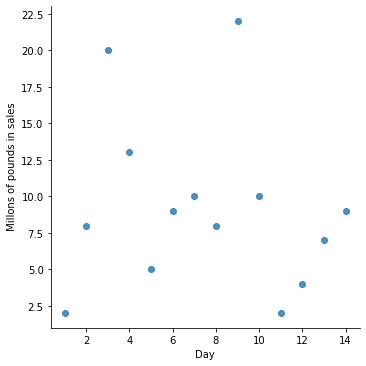

In [3]:
sns.lmplot(df.columns[0], df.columns[1],data=df, fit_reg=False)

In [4]:
bootstraps=4
statistics=[]
for i in range(bootstraps):
 sample = np.random.choice(data,size=len(data),replace='TRUE')
 #stat = np.mean(sample)
 statistics.append(sample)

#np.mean(statistics)
sample=np.sort(sample)
print(sample)

[ 4.  5.  7.  7.  8.  8.  8.  9.  9.  9.  9. 10. 22. 22.]


In [5]:
print(statistics)

[array([ 7., 10., 10., 13.,  7.,  2.,  2., 13.,  8.,  4., 10.,  2., 22.,
       20.]), array([ 5.,  4.,  8.,  4.,  8., 10., 22.,  5.,  4.,  4., 22., 10., 10.,
        2.]), array([13.,  8.,  9.,  9.,  9.,  7.,  4., 10.,  9., 13.,  7., 10.,  8.,
        2.]), array([ 8.,  8.,  9.,  7.,  9.,  9.,  5.,  9., 22.,  4.,  8., 10., 22.,
        7.])]


In [6]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	# <---INSERT YOUR CODE HERE--->
	statistics=[]
	mean_samples=[]
	for i in range(n_iterations):
		sample = np.random.choice(data,size=sample_size,replace='TRUE')
		statistics.append(sample)
		mean_sample = np.mean(sample)
		mean_samples.append(mean_sample)
	data_mean=np.mean(statistics)
	mean_samples=np.sort(mean_samples)
	lower=np.percentile(mean_samples,2.5)
	upper=np.percentile(mean_samples,97.5)
	return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

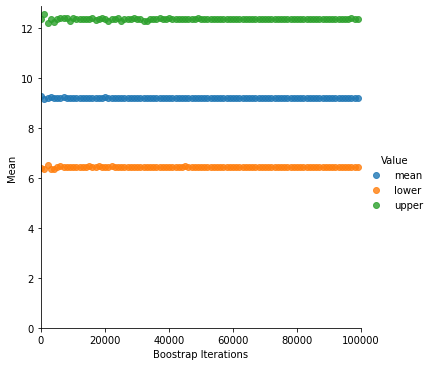

In [7]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [8]:
def boostrap_mean_ci(d_sample, sample_size, iterations, ci):
	# <---INSERT YOUR CODE HERE--->
	statistics=[]
	mean_samples=[]
	for i in range(iterations):
		sample = np.random.choice(d_sample,size=sample_size,replace='TRUE')
		statistics.append(sample)
		mean_sample = np.nanmean(sample)
		mean_samples.append(mean_sample)
	data_mean=np.nanmean(statistics)
	mean_samples=np.sort(mean_samples)
	l=(100-ci)/2
	u=(100-l)
	lower=np.percentile(mean_samples,l)
	upper=np.percentile(mean_samples,u)
	return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


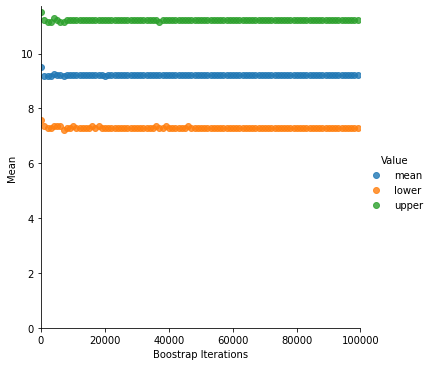

In [9]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


(2) Data visualisation:

###Vehicles dataset


In [55]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv',sep=',')
print("Shape of Dataset",df.shape)
df.head()

Shape of Dataset (249, 2)


,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0


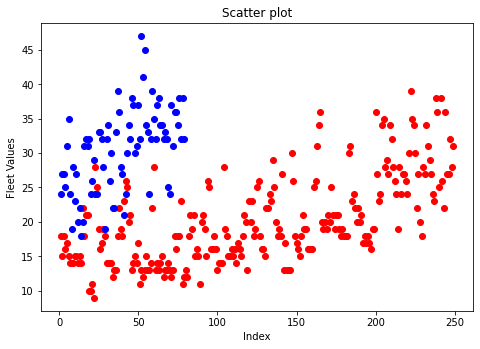

In [58]:
vrange=np.arange(1,250,1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(vrange, df['Current fleet'], color='r')
ax.scatter(vrange, df['New Fleet'], color='b')
ax.set_xlabel('Index')
ax.set_ylabel('Fleet Values')
ax.set_title('Scatter plot')
plt.show()

Text(0, 0.5, 'Count')

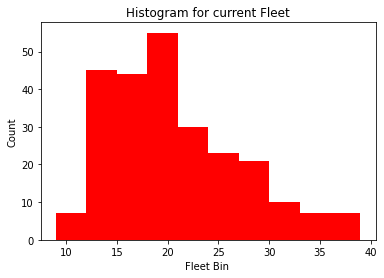

In [65]:
plt.hist(cur_flt_data, color='r')
plt.title('Histogram for current Fleet')
plt.xlabel('Fleet Bin ')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

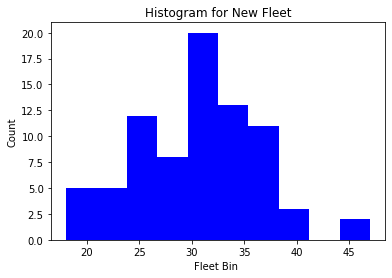

In [66]:
plt.hist(new_flt_data, color='b')
plt.title('Histogram for New Fleet')
plt.xlabel('Fleet Bin ')
plt.ylabel('Count')

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [76]:
Cur_fleet_mean = df['Current fleet'].mean()
New_fleet_mean = df['New Fleet'].mean()
print('Current Fleet mean ', Cur_fleet_mean)
print('New Fleet mean ', New_fleet_mean)

Current Fleet mean  20.14457831325301
New Fleet mean  30.481012658227847


In [79]:
cur_mean, cur_low,cur_upper=boostrap_mean_ci(cur_flt_data, cur_flt_data.shape, 10000, 85)
print("mean:",cur_mean) #mean of current fleet
print("lower:",cur_low)
print("upper:",cur_upper)

mean: 20.14703654618474
lower: 19.57831325301205
upper: 20.72690763052209


In [78]:
new_mean, new_low,new_upper=boostrap_mean_ci(new_flt_data, new_flt_data.shape, 30000, 75)
print("mean:",new_mean) 
print("lower:",new_low)
print("upper:",new_upper)

mean: 0.317239625167336
lower: 0.285140562248996
upper: 0.3493975903614458


In [87]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations,ci):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    sample1_mean,_ ,_ = boostrap_mean_ci(sample1,sample1.shape,n_permutations,ci)
    sample2_mean,_ ,_ = boostrap_mean_ci(sample2,sample2.shape,n_permutations,ci)
    
    sample2_mean = sample2.mean()
    diff_mean = sample2_mean - sample1_mean
    concat=np.concatenate((sample1,sample2))
    len_sample1 = len(sample1)

    count_p=0
    for i in range(n_permutations):
      perm_value=np.random.permutation(concat)
      pcur=perm_value[:len_sample1]
      pnew=perm_value[len_sample1:]
      mean1=np.mean(pcur)
      mean2=np.mean(pnew)
      diff_mean_2=mean2-mean1
      if (diff_mean_2>diff_mean):
        count_p += 1
    
    p_value=count_p/n_permutations

    return p_value

In [ ]:
curr_flt = df['Current fleet'].dropna()
new_flt = df['New Fleet'].dropna()

In [89]:
permut_test(curr_flt,new_flt,30000,99)

0.0

In [90]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


In [91]:
print('length of PA is :',len(dem_share_PA))
print('length of OK is :',len(dem_share_OH))

length of PA is : 67
length of OK is : 88


In [93]:
boostrap_mean_ci(dem_share_OH,len(dem_share_OH),25000,90)

(44.32631697727271, 42.589147727272724, 46.02286363636364)

In [94]:
boostrap_mean_ci(dem_share_PA,len(dem_share_PA),25000,90)

(45.469108065671634, 43.554470149253746, 47.47045522388059)

In [95]:
permut_test(curr_flt,new_flt,20000,90)

0.0